## BoomBike Case Study - Linear Regression

**Dataset used for this use-case as provided by upGrad**

=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)



_____________________________________________________________________________________________________________

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data understanding, preparation and EDA**

In [2]:
df_boombike_day = pd.read_csv("day.csv")
df_boombike_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
df_boombike_day.shape

(730, 16)

In [4]:
df_boombike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df_boombike_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df_boombike_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

**Visualize dataset**

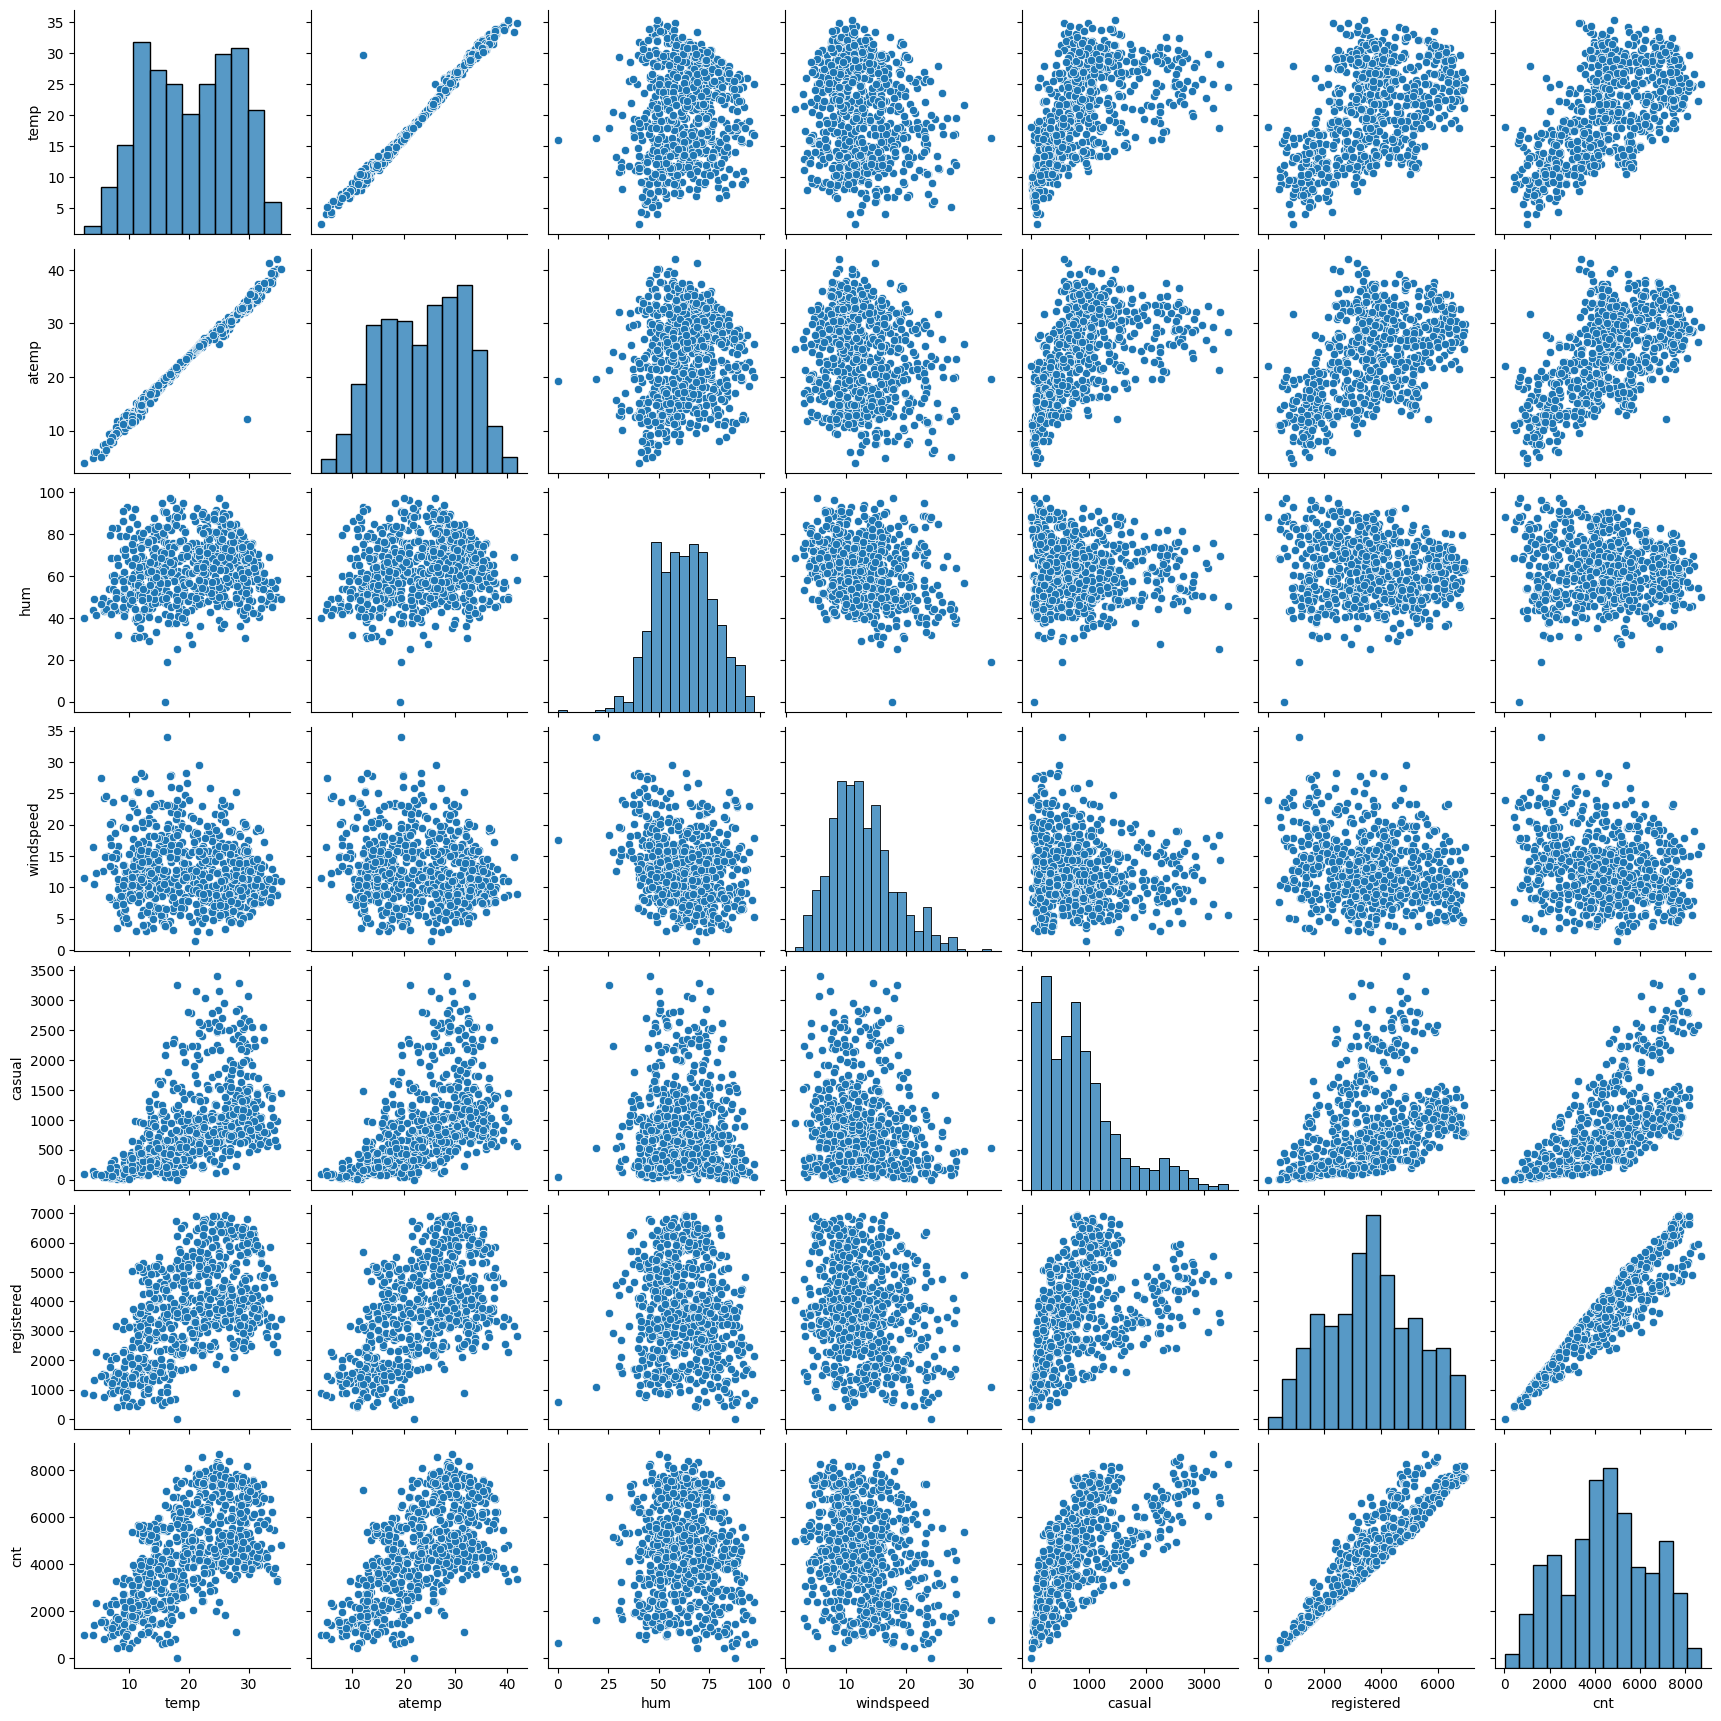

In [7]:
sns.pairplot(df_boombike_day[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

Observations:
1. 
2. 

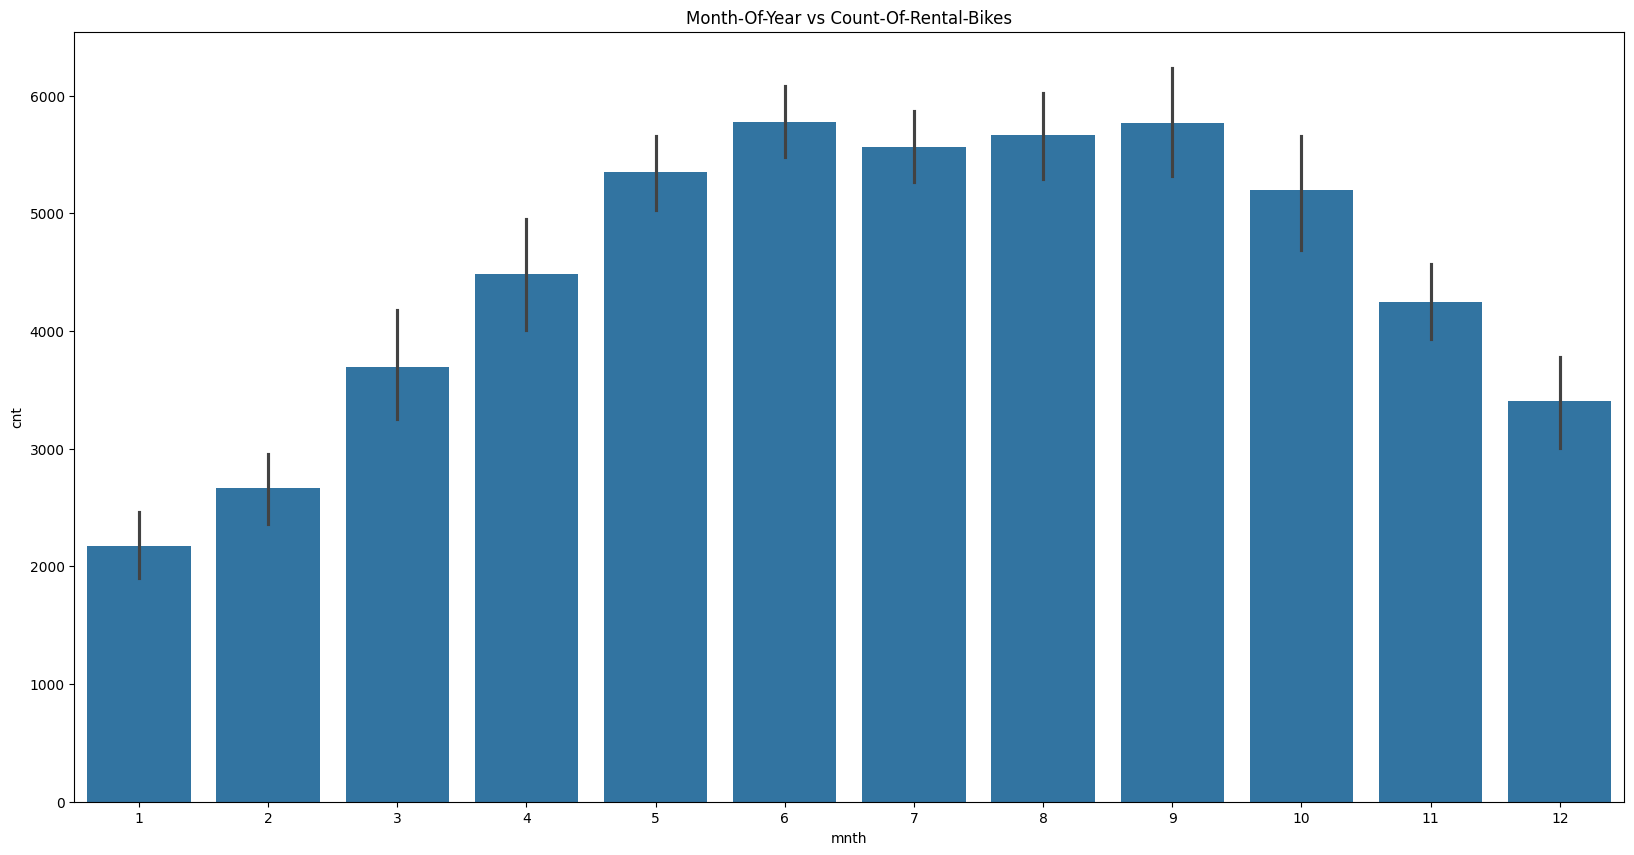

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x="mnth", y="cnt",data=df_boombike_day)
plt.title('Month-Of-Year vs Count-Of-Rental-Bikes')
plt.show()

Observations:
1.
2.


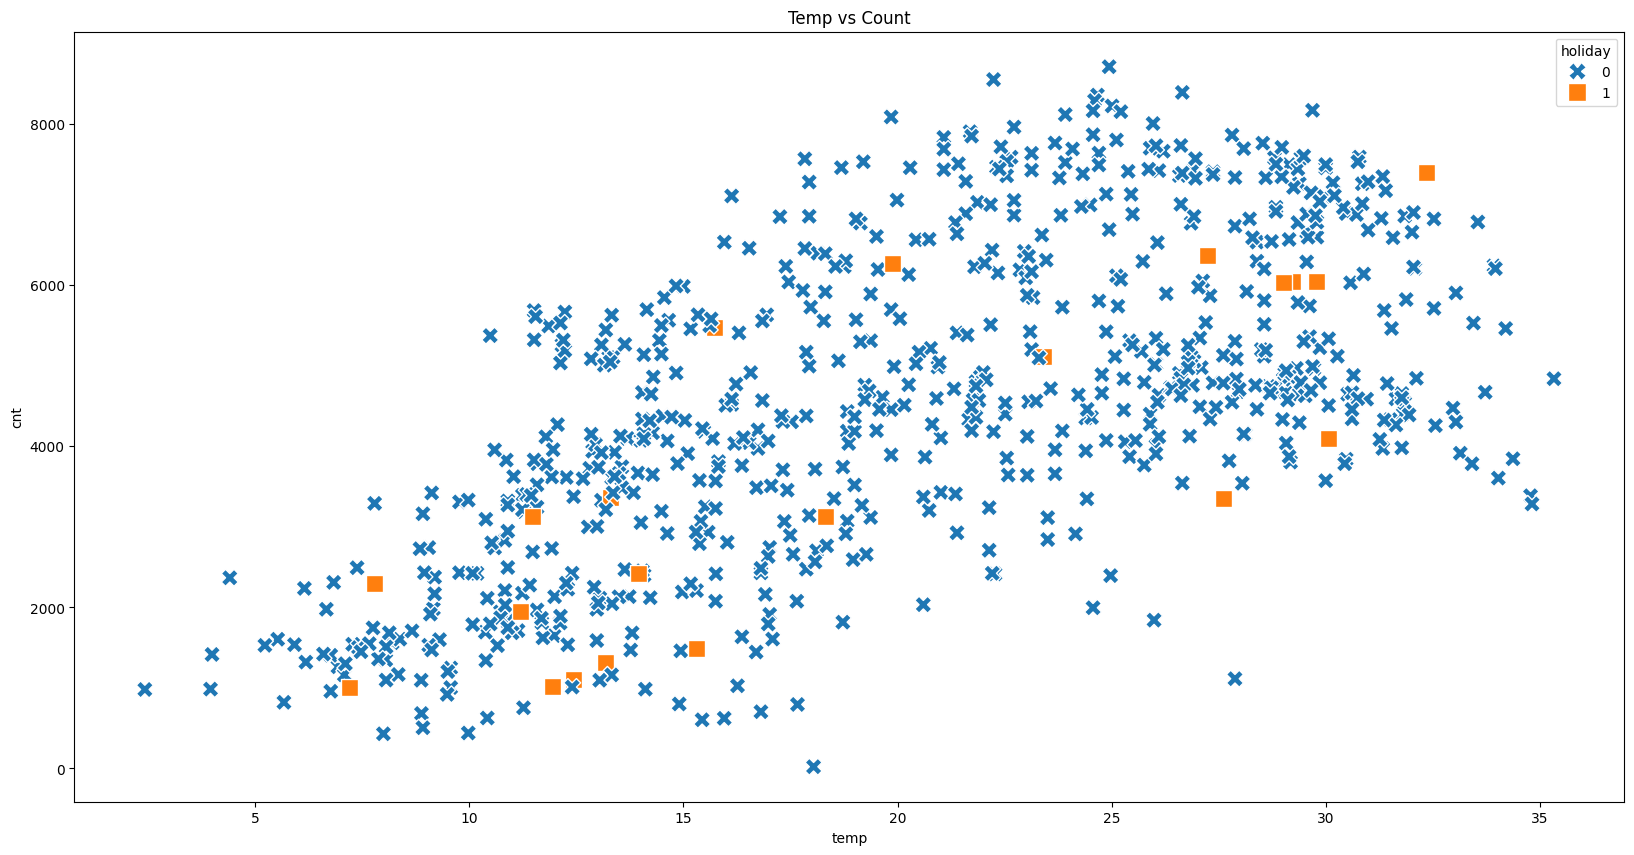

In [9]:
plt.figure(figsize = (20,10)) 
markers = {1: "s", 0: "X"}
sns.scatterplot(data=df_boombike_day, x="temp", y="cnt", style="holiday", hue="holiday", markers=markers, s=150)
plt.title('Temp vs Count')
plt.show()

Observations:
1.
2.

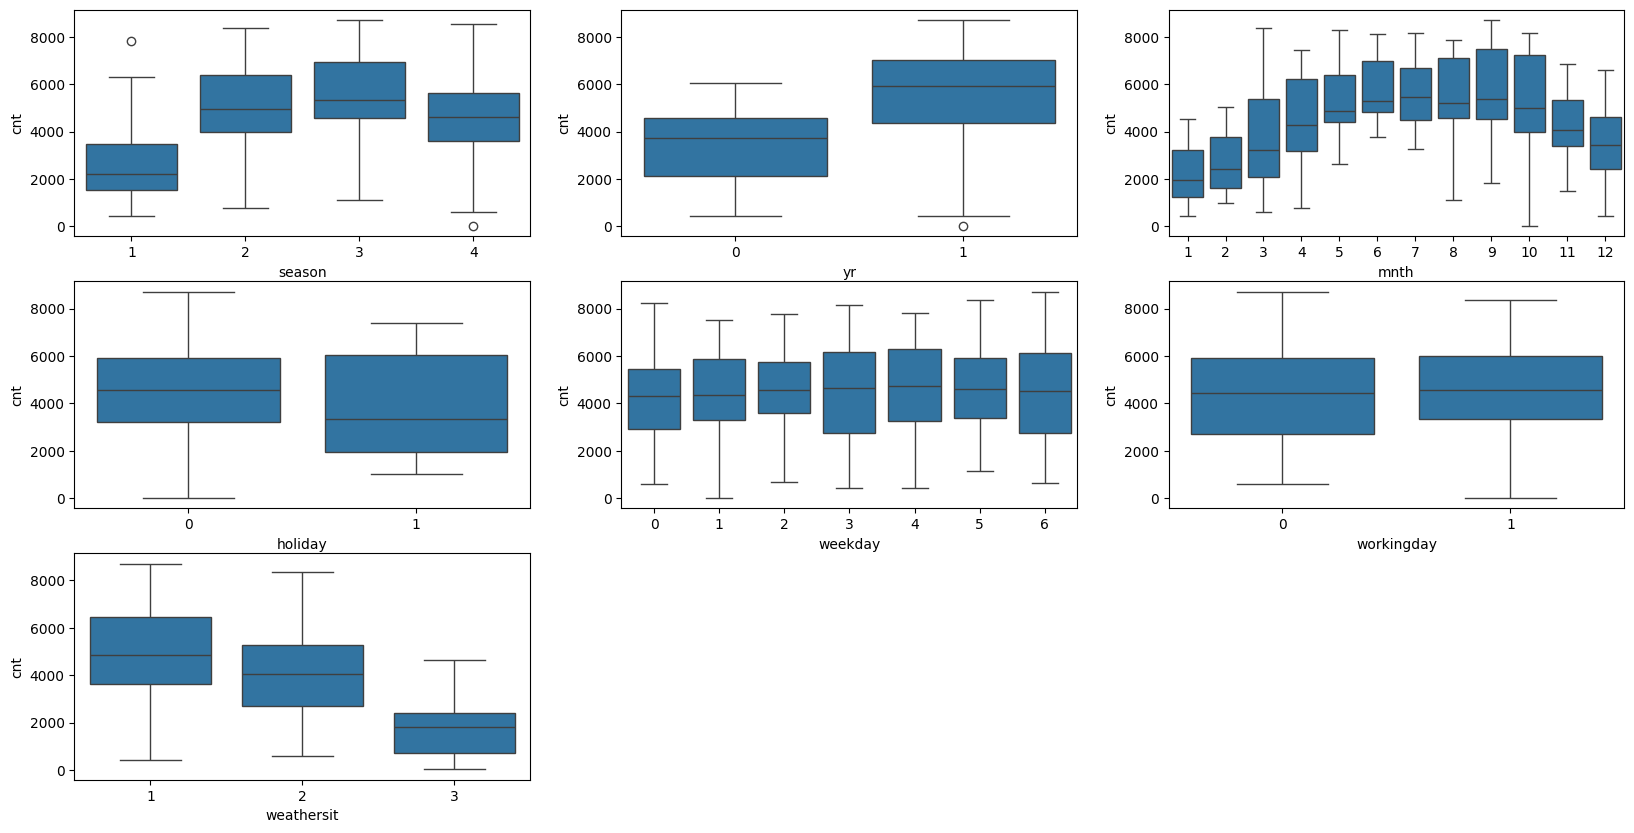

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_boombike_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_boombike_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_boombike_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_boombike_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_boombike_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_boombike_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_boombike_day)
plt.show()

Observations:
1.
2.

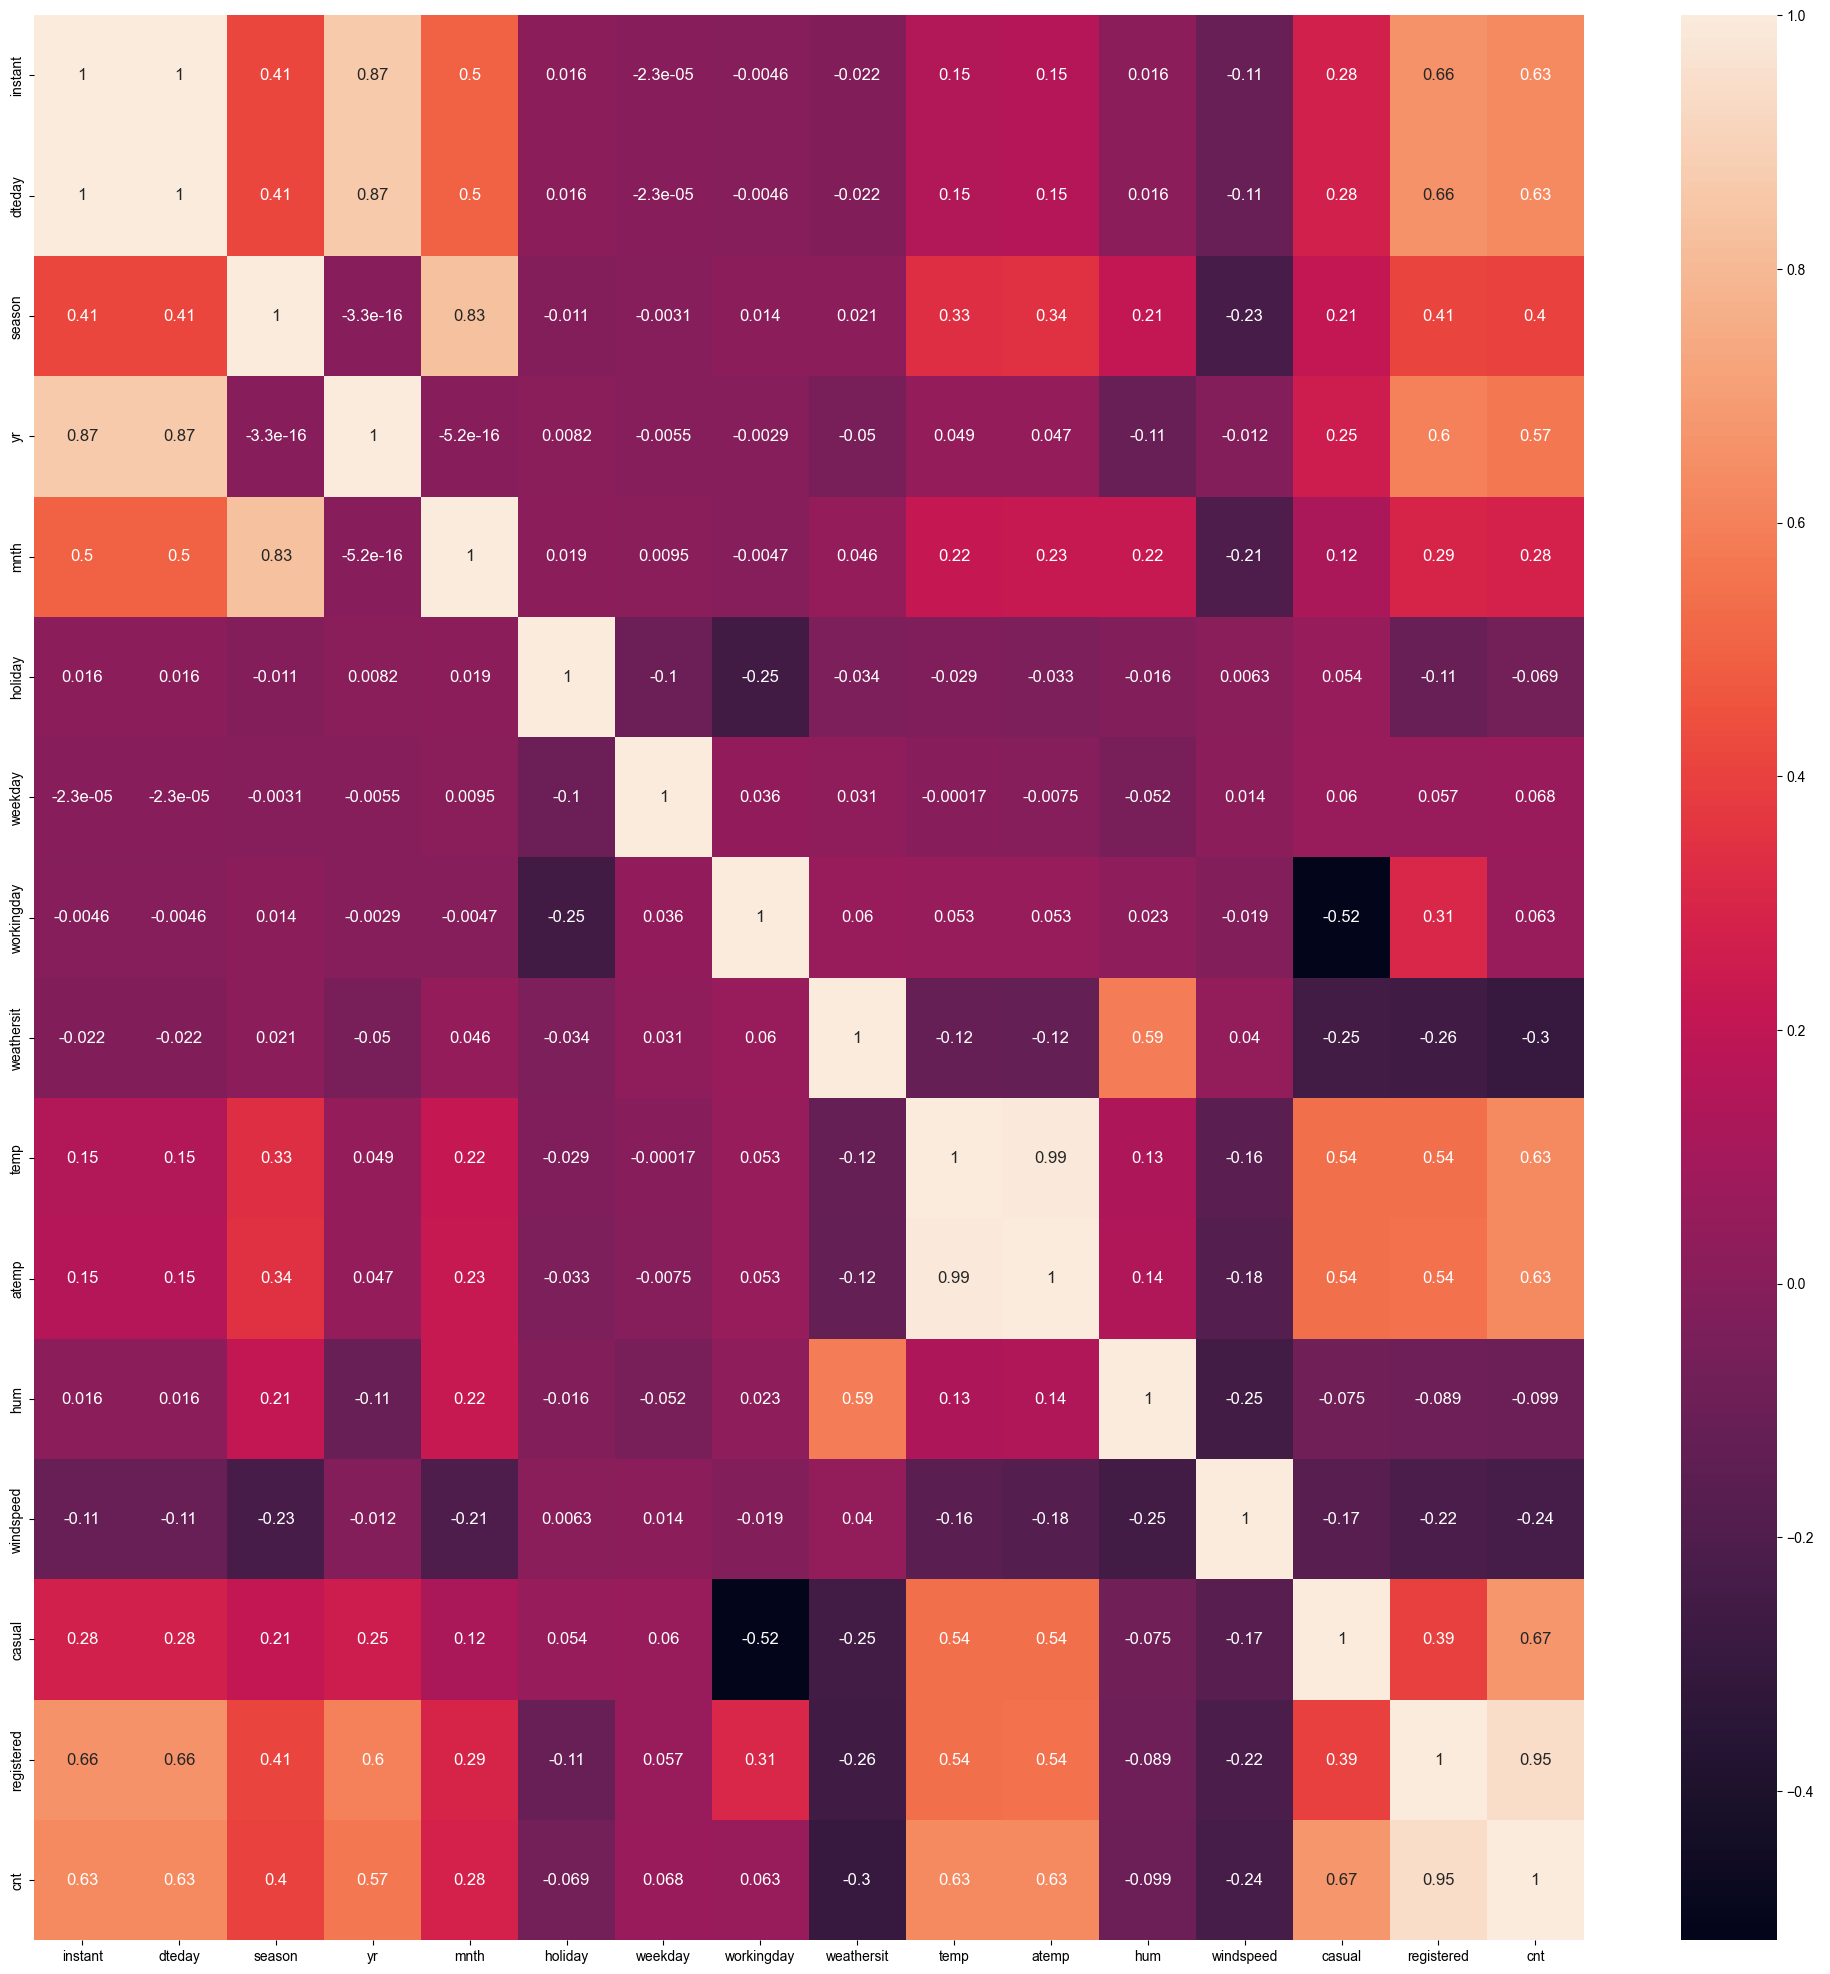

In [11]:
df_boombike_day['dteday'] =  pd.to_datetime(df_boombike_day['dteday'],format='%d-%m-%Y')
plt.figure(figsize=(25,25))
sns.heatmap(df_boombike_day.corr(),annot=True,annot_kws={"fontsize":12})
sns.set_theme(font_scale=2)
plt.show()

Observations:
1.
2.

**Drop highly correlated and unwanted features**

In [12]:
df_boombike_day.drop(['instant'],axis=1,inplace=True)

In [13]:
df_boombike_day.drop(['temp'],axis=1,inplace=True)

In [14]:
df_boombike_day.drop(['dteday'],axis=1,inplace=True)

In [15]:
df_boombike_day.drop(['casual','registered'],axis=1,inplace=True)

In [16]:
df_boombike_day.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    8.150308   14.237589    5.195841  1936.011647  
min      1.000000    3.953480    0.000000    1.500244    22.000000  
25%      1.000000   16.889713   52.000000    9.041650  3169.750000  
50%      1.000000   24.368225   62.625000   12.125325  4548.500000  
75%      2.000000   30.445775   72.989575   15.625589  5966.000000  
max      3.000000   42.044800   97.250000   34.000021  8714.000000

In [17]:
df_boombike_day.head()

season  yr  mnth  holiday  weekday  workingday  weathersit     atemp  \
0       1   0     1        0        6           0           2  18.18125   
1       1   0     1        0        0           0           2  17.68695   
2       1   0     1        0        1           1           1   9.47025   
3       1   0     1        0        2           1           1  10.60610   
4       1   0     1        0        3           1           1  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

**Categorical Variables to be taken care of**

In [18]:
df_boombike_day["season"] = df_boombike_day["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [19]:
df_boombike_day["mnth"] = df_boombike_day["mnth"].map({1:'JAN',2:'FEB', 3:'MAR', 4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})


In [20]:
df_boombike_day["weekday"] = df_boombike_day["weekday"].map({0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THU',5:'FRI',6:'SAT'})


In [21]:
df_boombike_day["weathersit"] = df_boombike_day["weathersit"].map({1: 'Clear_FewClouds_PartlyCloudy',
                                                                   2: 'MistCloudy_MistBrokenClouds_MistFewClouds_Mist',
                                                                   3: 'LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds',
                                                                   4: 'HeavyRainIcePalletsThunderstormMist_SnowFog'})


In [22]:
for x in range(7):
    print(df_boombike_day.iloc[:,x:x+1].value_counts())
    print("\n")

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


yr
0     365
1     365
Name: count, dtype: int64


mnth
AUG     62
DEC     62
JAN     62
JUL     62
MAR     62
MAY     62
OCT     62
APR     60
JUN     60
NOV     60
SEP     60
FEB     56
Name: count, dtype: int64


holiday
0          709
1           21
Name: count, dtype: int64


weekday
MON        105
SAT        105
SUN        105
FRI        104
THU        104
TUE        104
WED        103
Name: count, dtype: int64


workingday
1             499
0             231
Name: count, dtype: int64


weathersit                                                             
Clear_FewClouds_PartlyCloudy                                               463
MistCloudy_MistBrokenClouds_MistFewClouds_Mist                             246
LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds     21
Name: count, dtype: int64




In [23]:
df_boombike_day.head()

season  yr mnth  holiday weekday  workingday  \
0  spring   0  JAN        0     SAT           0   
1  spring   0  JAN        0     SUN           0   
2  spring   0  JAN        0     MON           1   
3  spring   0  JAN        0     TUE           1   
4  spring   0  JAN        0     WED           1   

                                       weathersit     atemp      hum  \
0  MistCloudy_MistBrokenClouds_MistFewClouds_Mist  18.18125  80.5833   
1  MistCloudy_MistBrokenClouds_MistFewClouds_Mist  17.68695  69.6087   
2                    Clear_FewClouds_PartlyCloudy   9.47025  43.7273   
3                    Clear_FewClouds_PartlyCloudy  10.60610  59.0435   
4                    Clear_FewClouds_PartlyCloudy  11.46350  43.6957   

   windspeed   cnt  
0  10.749882   985  
1  16.652113   801  
2  16.636703  1349  
3  10.739832  1562  
4  12.522300  1600

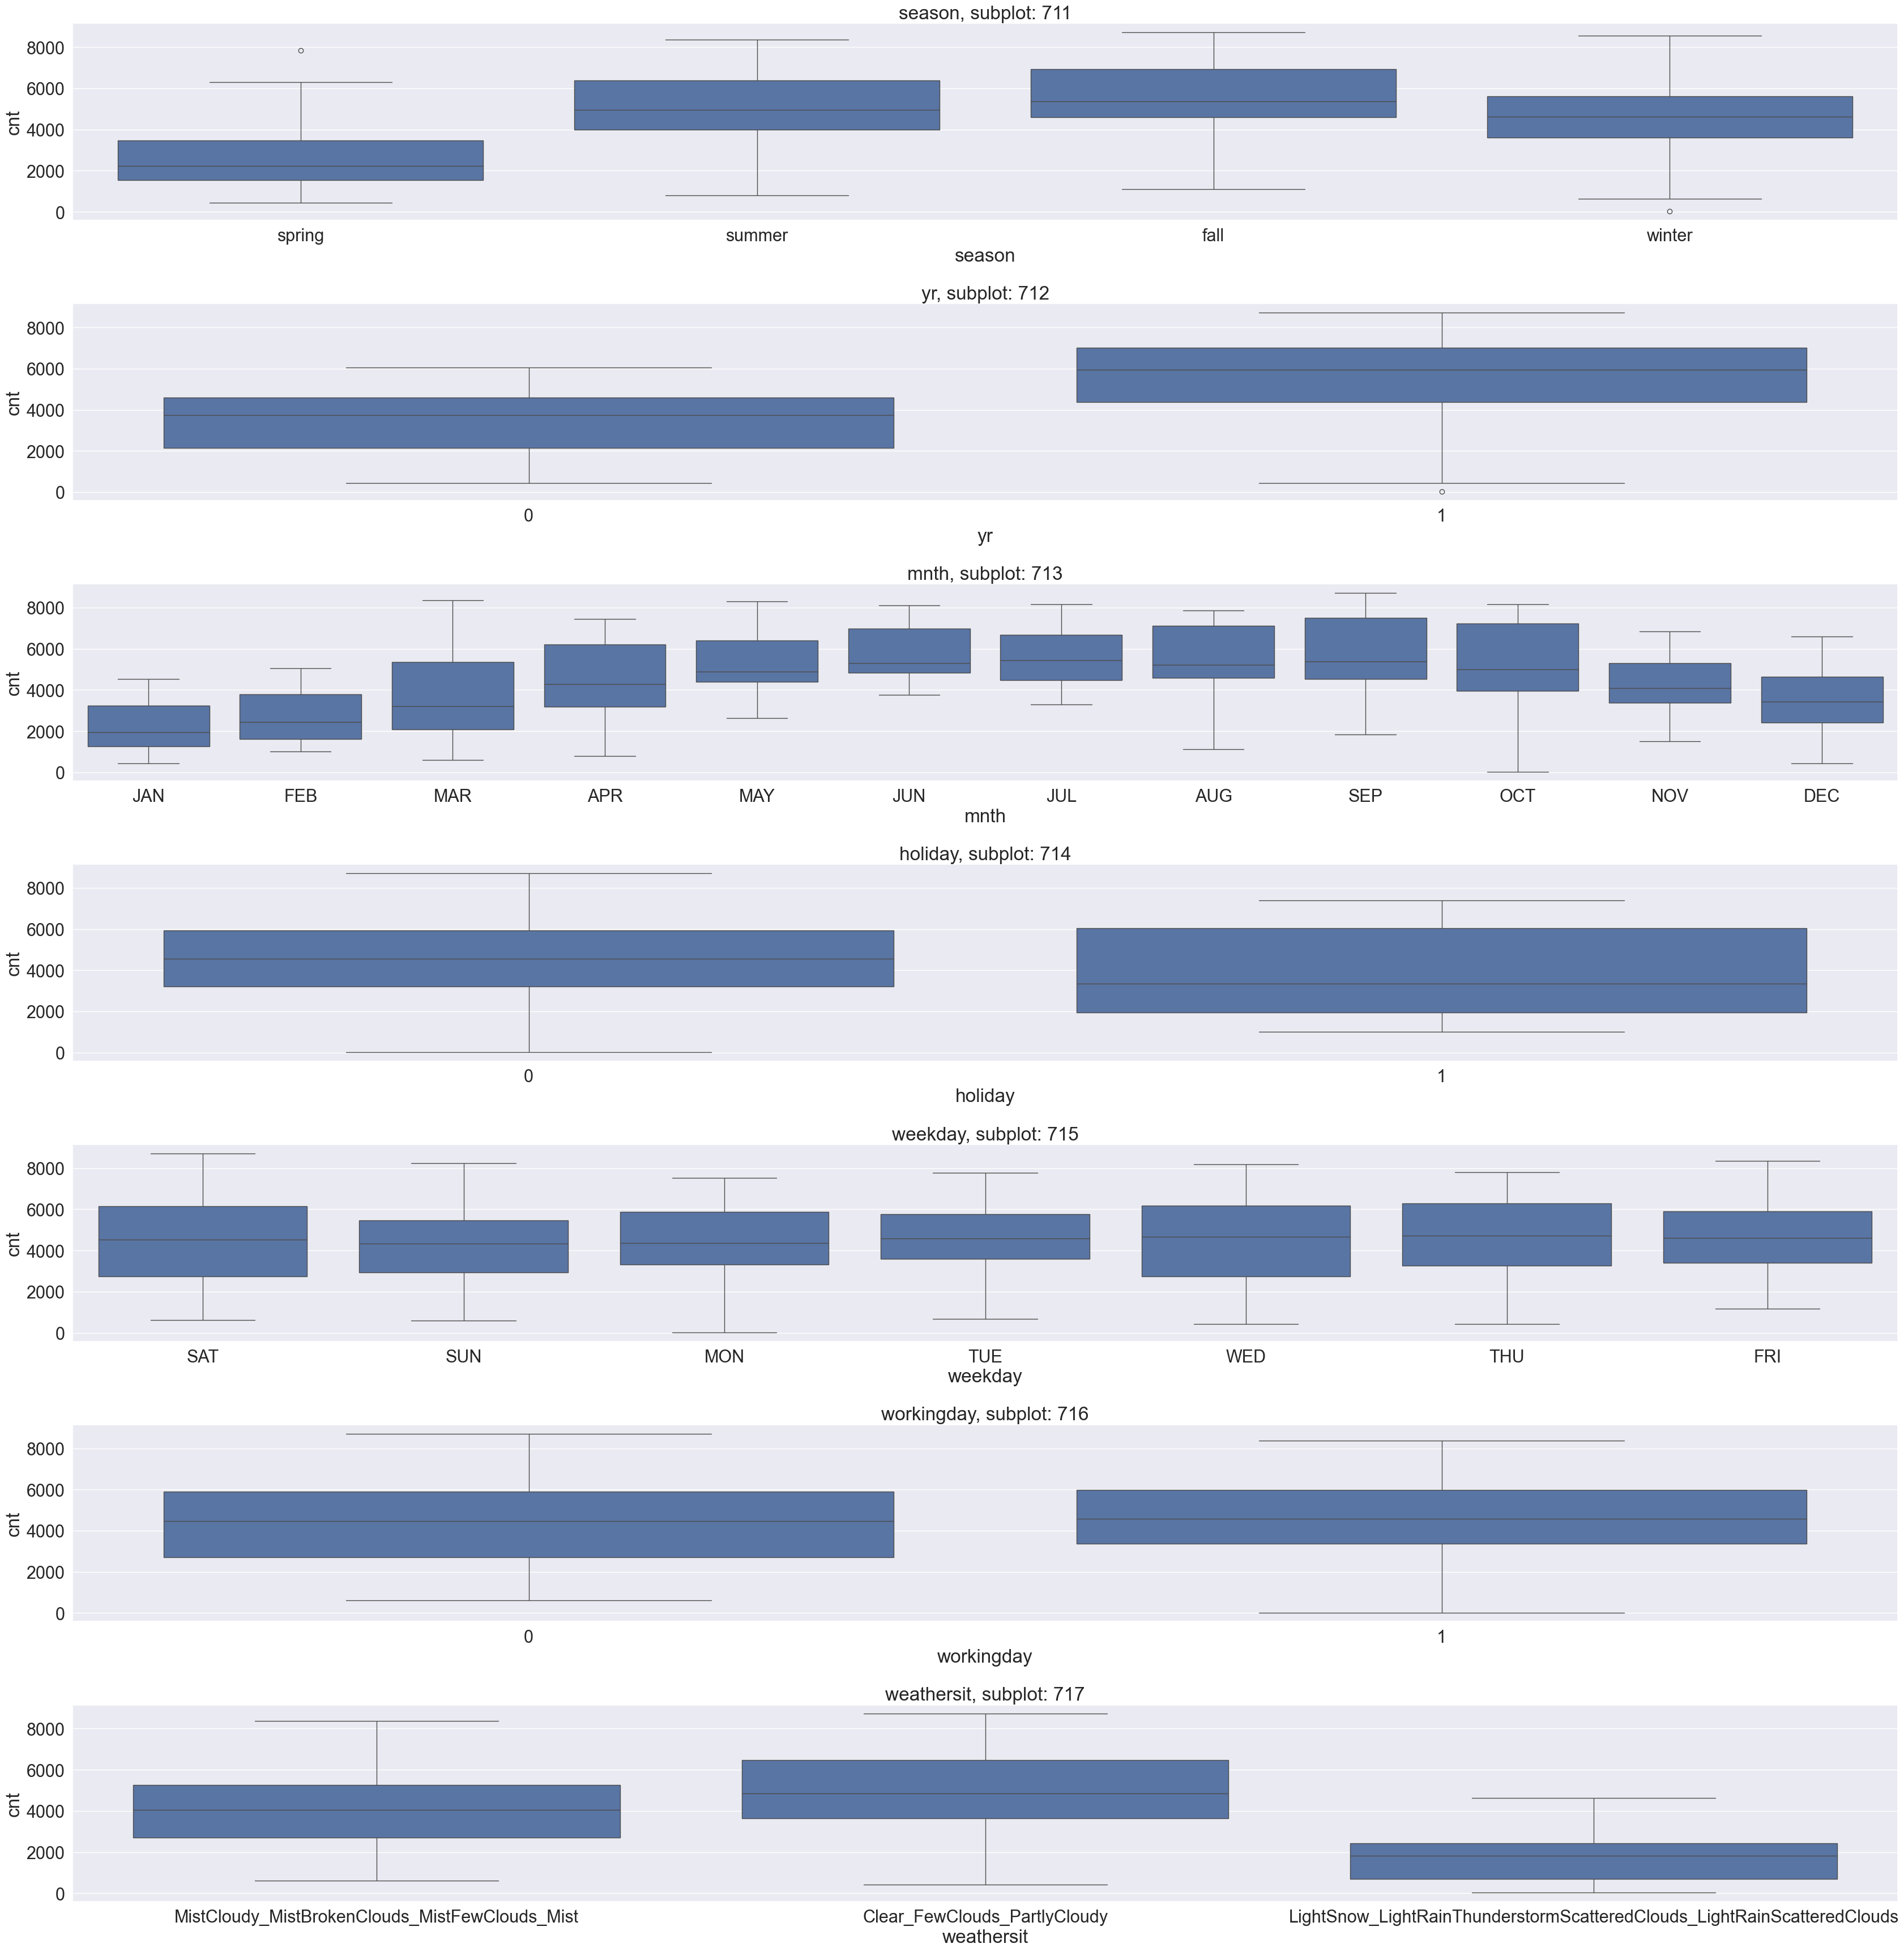

In [24]:
numRows = 7
numCols = 1  
pltCntr = 1  

boxFig = plt.figure(figsize=(35,35))
catVars = ['season','yr','mnth','holiday','weekday','workingday', "weathersit"]
for v in catVars:
    plt.subplot(numRows, numCols, pltCntr)
    plt.title('{}, subplot: {}{}{}'.format(v, numRows, numCols, pltCntr))
    plt.xlabel(v)
    sns.boxplot(x = df_boombike_day[v], y = df_boombike_day["cnt"], data = df_boombike_day)
    pltCntr = pltCntr + 1

boxFig.tight_layout()
plt.show()

Observations:
1.
2.

**Get_Dummies**

In [25]:
df_boombike_day.head()

season  yr mnth  holiday weekday  workingday  \
0  spring   0  JAN        0     SAT           0   
1  spring   0  JAN        0     SUN           0   
2  spring   0  JAN        0     MON           1   
3  spring   0  JAN        0     TUE           1   
4  spring   0  JAN        0     WED           1   

                                       weathersit     atemp      hum  \
0  MistCloudy_MistBrokenClouds_MistFewClouds_Mist  18.18125  80.5833   
1  MistCloudy_MistBrokenClouds_MistFewClouds_Mist  17.68695  69.6087   
2                    Clear_FewClouds_PartlyCloudy   9.47025  43.7273   
3                    Clear_FewClouds_PartlyCloudy  10.60610  59.0435   
4                    Clear_FewClouds_PartlyCloudy  11.46350  43.6957   

   windspeed   cnt  
0  10.749882   985  
1  16.652113   801  
2  16.636703  1349  
3  10.739832  1562  
4  12.522300  1600

In [26]:
df_dummy_seasons = pd.get_dummies(df_boombike_day['season'],drop_first = True)
df_dummy_seasons.head()

spring  summer  winter
0    True   False   False
1    True   False   False
2    True   False   False
3    True   False   False
4    True   False   False

In [27]:
df_dummy_months = pd.get_dummies(df_boombike_day['mnth'],drop_first = True)
df_dummy_months.head()

AUG    DEC    FEB   JAN    JUL    JUN    MAR    MAY    NOV    OCT    SEP
0  False  False  False  True  False  False  False  False  False  False  False
1  False  False  False  True  False  False  False  False  False  False  False
2  False  False  False  True  False  False  False  False  False  False  False
3  False  False  False  True  False  False  False  False  False  False  False
4  False  False  False  True  False  False  False  False  False  False  False

In [28]:
df_dummy_weekdays = pd.get_dummies(df_boombike_day['weekday'],drop_first = True)
df_dummy_weekdays.head()

MON    SAT    SUN    THU    TUE    WED
0  False   True  False  False  False  False
1  False  False   True  False  False  False
2   True  False  False  False  False  False
3  False  False  False  False   True  False
4  False  False  False  False  False   True

In [29]:
df_dummy_weathersit = pd.get_dummies(df_boombike_day['weathersit'],drop_first = True)
df_dummy_weathersit.head()

LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds  \
0                                              False                         
1                                              False                         
2                                              False                         
3                                              False                         
4                                              False                         

   MistCloudy_MistBrokenClouds_MistFewClouds_Mist  
0                                            True  
1                                            True  
2                                           False  
3                                           False  
4                                           False

In [30]:
df_boombike_day.head()

season  yr mnth  holiday weekday  workingday  \
0  spring   0  JAN        0     SAT           0   
1  spring   0  JAN        0     SUN           0   
2  spring   0  JAN        0     MON           1   
3  spring   0  JAN        0     TUE           1   
4  spring   0  JAN        0     WED           1   

                                       weathersit     atemp      hum  \
0  MistCloudy_MistBrokenClouds_MistFewClouds_Mist  18.18125  80.5833   
1  MistCloudy_MistBrokenClouds_MistFewClouds_Mist  17.68695  69.6087   
2                    Clear_FewClouds_PartlyCloudy   9.47025  43.7273   
3                    Clear_FewClouds_PartlyCloudy  10.60610  59.0435   
4                    Clear_FewClouds_PartlyCloudy  11.46350  43.6957   

   windspeed   cnt  
0  10.749882   985  
1  16.652113   801  
2  16.636703  1349  
3  10.739832  1562  
4  12.522300  1600

**Include new DataFrames**

In [31]:
df_boombike_day_new = pd.concat([df_boombike_day,df_dummy_seasons, df_dummy_months,df_dummy_weekdays,df_dummy_weathersit],axis=1)
df_boombike_day_new.head()


season  yr mnth  holiday weekday  workingday  \
0  spring   0  JAN        0     SAT           0   
1  spring   0  JAN        0     SUN           0   
2  spring   0  JAN        0     MON           1   
3  spring   0  JAN        0     TUE           1   
4  spring   0  JAN        0     WED           1   

                                       weathersit     atemp      hum  \
0  MistCloudy_MistBrokenClouds_MistFewClouds_Mist  18.18125  80.5833   
1  MistCloudy_MistBrokenClouds_MistFewClouds_Mist  17.68695  69.6087   
2                    Clear_FewClouds_PartlyCloudy   9.47025  43.7273   
3                    Clear_FewClouds_PartlyCloudy  10.60610  59.0435   
4                    Clear_FewClouds_PartlyCloudy  11.46350  43.6957   

   windspeed  ...    OCT    SEP    MON    SAT    SUN    THU    TUE    WED  \
0  10.749882  ...  False  False  False   True  False  False  False  False   
1  16.652113  ...  False  False  False  False   True  False  False  False   
2  16.636703  ...  False  False   True  False  False  False  False  False   
3  10.739832  ...  False  False  False  False  False  False   True  False   
4  12.522300  ...  False  False  False  False  False  False  False   True   

   LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds  \
0                                              False                         
1                                              False                         
2                                              False                         
3                                              False                         
4                                              False                         

   MistCloudy_MistBrokenClouds_MistFewClouds_Mist  
0                                            True  
1                                            True  
2                                           False  
3                                           False  
4                                           False  

[5 rows x 33 columns]

In [32]:
df_boombike_day_new = df_boombike_day_new.drop(['season','mnth','weekday','weathersit'],axis=1)
df_boombike_day_new.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  spring  \
0   0        0           0  18.18125  80.5833  10.749882   985    True   
1   0        0           0  17.68695  69.6087  16.652113   801    True   
2   0        0           1   9.47025  43.7273  16.636703  1349    True   
3   0        0           1  10.60610  59.0435  10.739832  1562    True   
4   0        0           1  11.46350  43.6957  12.522300  1600    True   

   summer  winter  ...    OCT    SEP    MON    SAT    SUN    THU    TUE  \
0   False   False  ...  False  False  False   True  False  False  False   
1   False   False  ...  False  False  False  False   True  False  False   
2   False   False  ...  False  False   True  False  False  False  False   
3   False   False  ...  False  False  False  False  False  False   True   
4   False   False  ...  False  False  False  False  False  False  False   

     WED  \
0  False   
1  False   
2  False   
3  False   
4   True   

   LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds  \
0                                              False                         
1                                              False                         
2                                              False                         
3                                              False                         
4                                              False                         

   MistCloudy_MistBrokenClouds_MistFewClouds_Mist  
0                                            True  
1                                            True  
2                                           False  
3                                           False  
4                                           False  

[5 rows x 29 columns]

In [33]:
df_boombike_day_new.describe()

yr     holiday  workingday       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   23.726322   62.765175   12.763620   
std      0.500343    0.167266    0.465405    8.150308   14.237589    5.195841   
min      0.000000    0.000000    0.000000    3.953480    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   16.889713   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   24.368225   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   30.445775   72.989575   15.625589   
max      1.000000    1.000000    1.000000   42.044800   97.250000   34.000021   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

In [34]:
df_boombike_day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   yr                                                                       730 non-null    int64  
 1   holiday                                                                  730 non-null    int64  
 2   workingday                                                               730 non-null    int64  
 3   atemp                                                                    730 non-null    float64
 4   hum                                                                      730 non-null    float64
 5   windspeed                                                                730 non-null    float64
 6   cnt                                                                      7

In [35]:
df_boombike_day_new.shape

(730, 29)

**Create TRAIN-TEST datasets**

In [36]:
##pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
##pip install statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
df_boombike_train, df_boombike_test = train_test_split(df_boombike_day_new, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_boombike_train.shape)
print(df_boombike_test.shape)

(510, 29)
(219, 29)


**Normalization using Min-Max scaling of Linear Regression**

In [39]:
minmax_scaler_boombike = MinMaxScaler()

In [40]:
numericVars = ['atemp','hum','windspeed','cnt']

df_boombike_train[numericVars] = minmax_scaler_boombike.fit_transform(df_boombike_train[numericVars])

df_boombike_train.head()

yr  holiday  workingday     atemp       hum  windspeed       cnt  spring  \
653   1        0           1  0.501133  0.575354   0.300794  0.864243   False   
576   1        0           1  0.766351  0.725633   0.264686  0.827658   False   
426   1        0           0  0.438975  0.640189   0.255342  0.465255    True   
728   1        0           0  0.200348  0.498067   0.663106  0.204096    True   
482   1        0           0  0.391735  0.504508   0.188475  0.482973   False   

     summer  winter  ...    OCT    SEP    MON    SAT    SUN    THU    TUE  \
653   False    True  ...   True  False  False  False  False  False   True   
576   False   False  ...  False  False  False  False  False  False   True   
426   False   False  ...  False  False  False   True  False  False  False   
728   False   False  ...  False  False  False  False   True  False  False   
482    True   False  ...  False  False  False   True  False  False  False   

       WED  \
653  False   
576  False   
426  False   
728  False   
482  False   

     LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds  \
653                                              False                         
576                                              False                         
426                                              False                         
728                                              False                         
482                                              False                         

     MistCloudy_MistBrokenClouds_MistFewClouds_Mist  
653                                           False  
576                                           False  
426                                            True  
728                                           False  
482                                            True  

[5 rows x 29 columns]

In [41]:
boolean_columns = df_boombike_train.select_dtypes(include='bool').columns
df_boombike_train[boolean_columns] = df_boombike_train[boolean_columns].astype(int)

In [42]:
df_boombike_train.describe()

yr     holiday  workingday       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.512989    0.650369    0.320768   
std      0.500429    0.157763    0.468282    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.332086    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.526811    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter  ...         OCT  \
count  510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean     0.513620    0.243137    0.245098    0.24902  ...    0.086275   
std      0.224593    0.429398    0.430568    0.43287  ...    0.281045   
min      0.000000    0.000000    0.000000    0.00000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.00000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.00000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.00000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.00000  ...    1.000000   

              SEP         MON         SAT         SUN         THU         TUE  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.150980    0.154902    0.143137    0.133333    0.131373   
std      0.272166    0.358381    0.362166    0.350557    0.340268    0.338139   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              WED  \
count  510.000000   
mean     0.158824   
std      0.365870   
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      0.000000   
max      1.000000   

       LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds  \
count                                         510.000000                         
mean                                            0.029412                         
std                                             0.169124                         
min                                             0.000000                         
25%                                             0.000000                         
50%                                             0.000000                         
75%                                             0.000000                         
max                                             1.000000                         

       MistCloudy_MistBrokenClouds_MistFewClouds_Mist  
count                                      510.000000  
mean                                         0.343137  
std                                          0.475223  
min                                          0.000000  
25%                                          0.000000  
50%                                          0.000000  
75%                                          1.000000  
max                                          1.000000  

[8 rows x 29 columns]

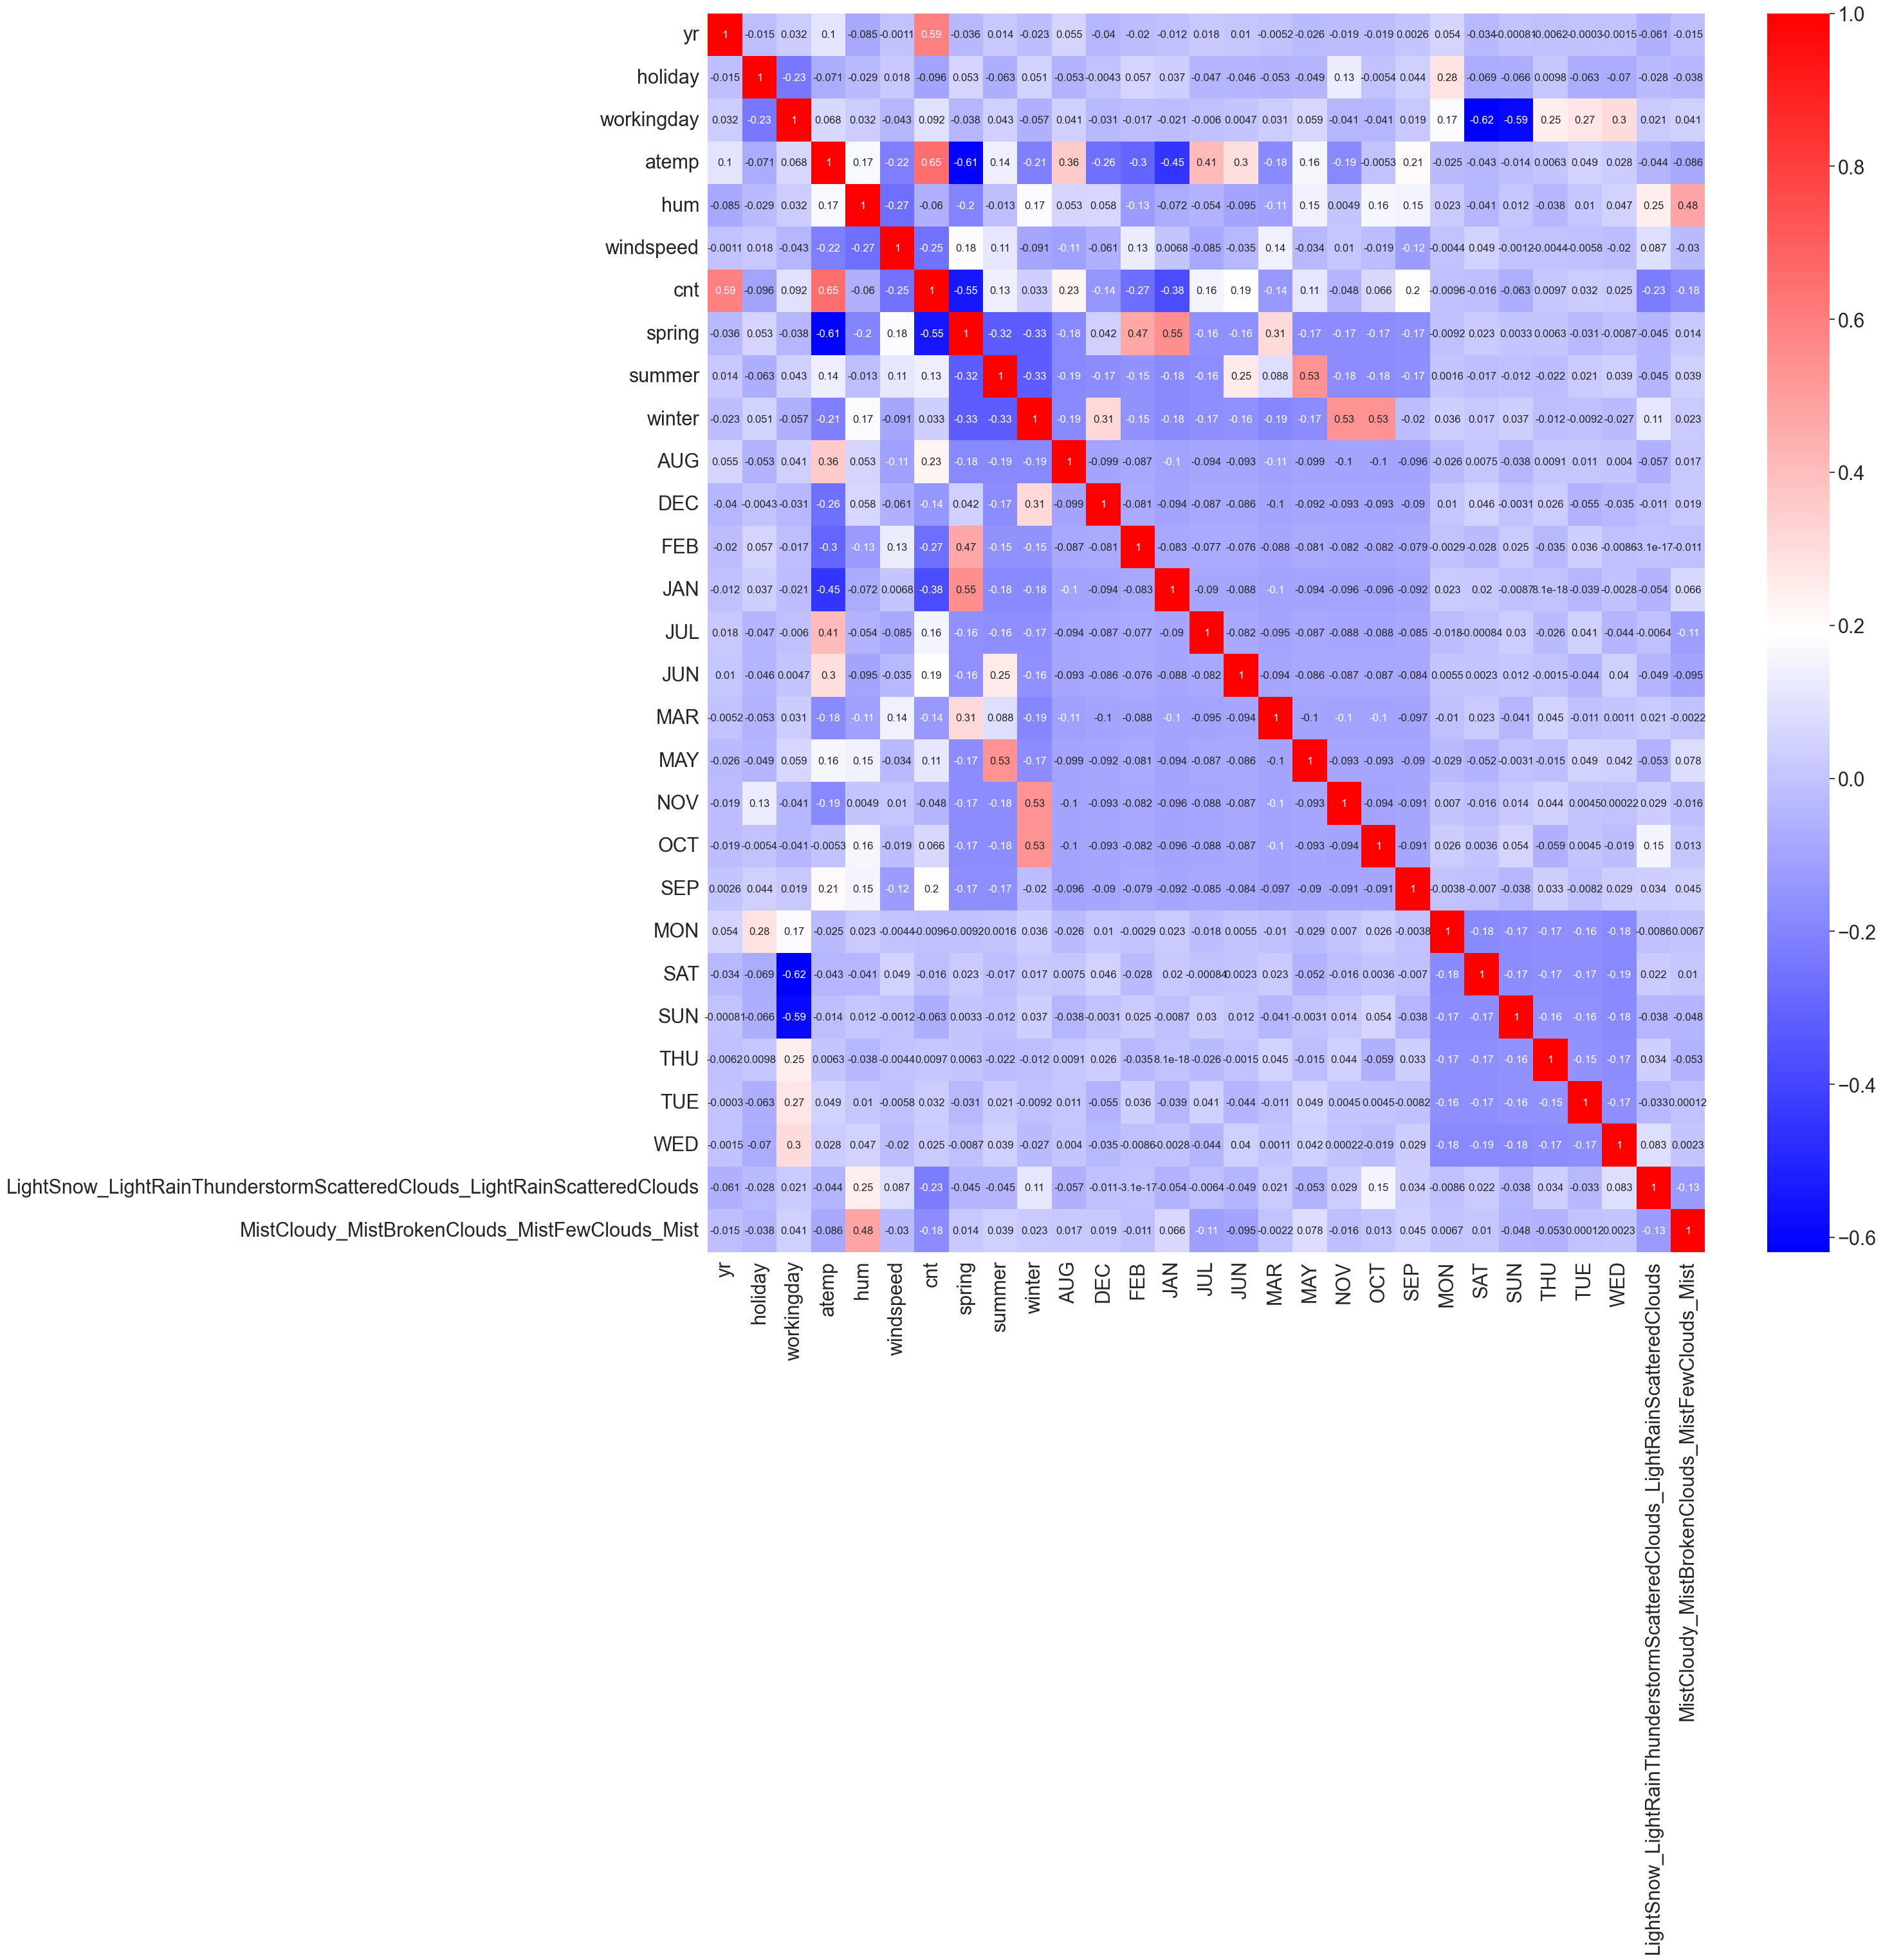

In [43]:
plt.figure(figsize = (25,25))
sns.heatmap(df_boombike_train.corr(),annot=True,annot_kws={"fontsize":12},cmap="bwr")
sns.set_theme(font_scale=2)
plt.show()

**Using STATSMODELS and RFE**

In [44]:
y_train_boombike = df_boombike_train.pop('cnt')
x_train_boombike = df_boombike_train

In [45]:
x_train_boombike.head()

yr  holiday  workingday     atemp       hum  windspeed  spring  summer  \
653   1        0           1  0.501133  0.575354   0.300794       0       0   
576   1        0           1  0.766351  0.725633   0.264686       0       0   
426   1        0           0  0.438975  0.640189   0.255342       1       0   
728   1        0           0  0.200348  0.498067   0.663106       1       0   
482   1        0           0  0.391735  0.504508   0.188475       0       1   

     winter  AUG  ...  OCT  SEP  MON  SAT  SUN  THU  TUE  WED  \
653       1    0  ...    1    0    0    0    0    0    1    0   
576       0    0  ...    0    0    0    0    0    0    1    0   
426       0    0  ...    0    0    0    1    0    0    0    0   
728       0    0  ...    0    0    0    0    1    0    0    0   
482       0    0  ...    0    0    0    1    0    0    0    0   

     LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds  \
653                                                  0                         
576                                                  0                         
426                                                  0                         
728                                                  0                         
482                                                  0                         

     MistCloudy_MistBrokenClouds_MistFewClouds_Mist  
653                                               0  
576                                               0  
426                                               1  
728                                               0  
482                                               1  

[5 rows x 28 columns]

In [46]:
x_train_boombike.shape

(510, 28)

In [47]:
lr_model = LinearRegression()
lr_model.fit(x_train_boombike,y_train_boombike)


LinearRegression()

In [48]:
rfe_boombike = RFE(lr_model, n_features_to_select=15)

In [49]:
rfe_boombike = rfe_boombike.fit(x_train_boombike, y_train_boombike)

In [50]:
list(zip(x_train_boombike.columns,rfe_boombike.support_,rfe_boombike.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('AUG', False, 7),
 ('DEC', False, 3),
 ('FEB', False, 4),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 8),
 ('MAR', False, 14),
 ('MAY', False, 5),
 ('NOV', False, 2),
 ('OCT', False, 12),
 ('SEP', True, 1),
 ('MON', False, 10),
 ('SAT', True, 1),
 ('SUN', True, 1),
 ('THU', False, 11),
 ('TUE', False, 9),
 ('WED', False, 13),
 ('LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds',
  True,
  1),
 ('MistCloudy_MistBrokenClouds_MistFewClouds_Mist', True, 1)]

In [51]:
rfe_support_cols = x_train_boombike.columns[rfe_boombike.support_]
print(len(rfe_support_cols))
print(rfe_support_cols)

15
Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'JAN', 'JUL', 'SEP', 'SAT', 'SUN',
       'LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds',
       'MistCloudy_MistBrokenClouds_MistFewClouds_Mist'],
      dtype='object')


In [52]:
rfe_reject_cols = x_train_boombike.columns[~rfe_boombike.support_]
print(len(rfe_reject_cols))
print(rfe_reject_cols)

13
Index(['summer', 'AUG', 'DEC', 'FEB', 'JUN', 'MAR', 'MAY', 'NOV', 'OCT', 'MON',
       'THU', 'TUE', 'WED'],
      dtype='object')


**STATSMODEL #1**

In [53]:
x_train_boombike_rfe_support = x_train_boombike[rfe_support_cols]

In [54]:
x_train_boombike_rfe_support = sm.add_constant(x_train_boombike_rfe_support)

In [55]:
lr_model = sm.OLS(y_train_boombike,x_train_boombike_rfe_support).fit() 

In [56]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.66e-188
Time:                        22:03:53   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2535      0.026      9.914      0.000       0.203       0.304
yr                                                                          0.2325      0.008     28.590      0.000       0.217       0.248
holiday                                                                    -0.0025      0.021     -0.117      0.907      -0.045       0.040
workingday                                                                  0.0966      0.009     10.325      0.000       0.078       0.115
atemp                                                                       0.4761      0.033     14.319      0.000       0.411       0.541
hum                                                                        -0.1449      0.038     -3.824      0.000      -0.219      -0.070
windspeed                                                                  -0.1615      0.026     -6.254      0.000      -0.212      -0.111
spring                                                                     -0.1043      0.015     -6.858      0.000      -0.134      -0.074
winter                                                                      0.0458      0.012      3.749      0.000       0.022       0.070
JAN                                                                        -0.0398      0.018     -2.264      0.024      -0.074      -0.005
JUL                                                                        -0.0699      0.017     -4.083      0.000      -0.104      -0.036
SEP                                                                         0.0626      0.015      4.045      0.000       0.032       0.093
SAT                                                                         0.1066      0.011      9.287      0.000       0.084       0.129
SUN                                                                         0.0529      0.012      4.385      0.000       0.029       0.077
LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds    -0.2484      0.027     -9.373      0.000      -0.300      -0.196
MistCloudy_MistBrokenClouds_MistFewClouds_Mist                             -0.0594      0.011     -5.624      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       62.546   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.716
Skew:                          -0.605   Prob(JB):                     2.31e-37
Kurtosis:                       5.544   Cond. No.                     1.04e+16
============================

In [57]:
#Calculate VIF

x_train_boombike_new = x_train_boombike_rfe_support.drop(["const"], axis = 1)

In [58]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Features"] = x_train_boombike_new.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_boombike_new.values, i) for i in range(x_train_boombike_new.shape[1])]

print(vif_data)

                                             Features        VIF
0                                                  yr   1.033858
1                                             holiday   2.569620
2                                          workingday  41.668958
3                                               atemp   3.112487
4                                                 hum   1.906925
5                                           windspeed   1.200506
6                                              spring   2.660659
7                                              winter   1.745709
8                                                 JAN   1.556226
9                                                 JUL   1.296221
10                                                SEP   1.106761
11                                                SAT  10.158913
12                                                SUN   9.841102
13  LightSnow_LightRainThunderstormScatteredClouds...   1.253970
14     MistCloudy_MistBro

In [59]:
#drop 'holiday' with high p-value
x_train_boombike_new = x_train_boombike_new.drop(["holiday"], axis = 1)

**STATSMODEL #2**

In [60]:
x_train_boombike_new = sm.add_constant(x_train_boombike_new)

In [61]:
lr_model_02 = sm.OLS(y_train_boombike, x_train_boombike_new).fit()

In [62]:
lr_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.66e-188
Time:                        22:03:53   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2510      0.040      6.252      0.000       0.172       0.330
yr                                                                          0.2325      0.008     28.590      0.000       0.217       0.248
workingday                                                                  0.0991      0.026      3.848      0.000       0.048       0.150
atemp                                                                       0.4761      0.033     14.319      0.000       0.411       0.541
hum                                                                        -0.1449      0.038     -3.824      0.000      -0.219      -0.070
windspeed                                                                  -0.1615      0.026     -6.254      0.000      -0.212      -0.111
spring                                                                     -0.1043      0.015     -6.858      0.000      -0.134      -0.074
winter                                                                      0.0458      0.012      3.749      0.000       0.022       0.070
JAN                                                                        -0.0398      0.018     -2.264      0.024      -0.074      -0.005
JUL                                                                        -0.0699      0.017     -4.083      0.000      -0.104      -0.036
SEP                                                                         0.0626      0.015      4.045      0.000       0.032       0.093
SAT                                                                         0.1091      0.027      4.010      0.000       0.056       0.163
SUN                                                                         0.0554      0.027      2.024      0.043       0.002       0.109
LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds    -0.2484      0.027     -9.373      0.000      -0.300      -0.196
MistCloudy_MistBrokenClouds_MistFewClouds_Mist                             -0.0594      0.011     -5.624      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       62.546   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.716
Skew:                          -0.605   Prob(JB):                     2.31e-37
Kurtosis:                       5.544   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [63]:
x_train_boombike_new = x_train_boombike_new.drop(["const"], axis = 1)

In [64]:
# Calculate VIF for each feature for MODEL-02
vif_data = pd.DataFrame()
vif_data["Features"] = x_train_boombike_new.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_boombike_new.values, i) for i in range(x_train_boombike_new.shape[1])]

print(vif_data)

                                             Features        VIF
0                                                  yr   2.081701
1                                          workingday  17.128859
2                                               atemp  18.211874
3                                                 hum  29.984194
4                                           windspeed   4.514733
5                                              spring   3.052728
6                                              winter   2.109621
7                                                 JAN   1.681004
8                                                 JUL   1.400363
9                                                 SEP   1.203488
10                                                SAT   4.617907
11                                                SUN   4.490602
12  LightSnow_LightRainThunderstormScatteredClouds...   1.241473
13     MistCloudy_MistBrokenClouds_MistFewClouds_Mist   2.278189


In [65]:
x_train_boombike_new = x_train_boombike_new.drop(["SUN"], axis = 1)

**STATSMODEL #3**

In [66]:
x_train_boombike_new = sm.add_constant(x_train_boombike_new)

In [67]:
lr_model_03 = sm.OLS(y_train_boombike, x_train_boombike_new).fit()

In [68]:
lr_model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.73e-189
Time:                        22:03:53   Log-Likelihood:                 508.21
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2976      0.033      9.026      0.000       0.233       0.362
yr                                                                          0.2327      0.008     28.529      0.000       0.217       0.249
workingday                                                                  0.0519      0.011      4.711      0.000       0.030       0.074
atemp                                                                       0.4762      0.033     14.279      0.000       0.411       0.542
hum                                                                        -0.1434      0.038     -3.773      0.000      -0.218      -0.069
windspeed                                                                  -0.1621      0.026     -6.256      0.000      -0.213      -0.111
spring                                                                     -0.1053      0.015     -6.905      0.000      -0.135      -0.075
winter                                                                      0.0447      0.012      3.653      0.000       0.021       0.069
JAN                                                                        -0.0404      0.018     -2.289      0.023      -0.075      -0.006
JUL                                                                        -0.0691      0.017     -4.021      0.000      -0.103      -0.035
SEP                                                                         0.0605      0.015      3.906      0.000       0.030       0.091
SAT                                                                         0.0621      0.014      4.369      0.000       0.034       0.090
LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds    -0.2476      0.027     -9.317      0.000      -0.300      -0.195
MistCloudy_MistBrokenClouds_MistFewClouds_Mist                             -0.0591      0.011     -5.580      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       69.238   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.801
Skew:                          -0.653   Prob(JB):                     1.84e-43
Kurtosis:                       5.749   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
x_train_boombike_new = x_train_boombike_new.drop(["const"], axis = 1)

In [70]:
# Calculate VIF for each feature for MODEL-03
vif_data = pd.DataFrame()
vif_data["Features"] = x_train_boombike_new.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_boombike_new.values, i) for i in range(x_train_boombike_new.shape[1])]

print(vif_data)

                                             Features        VIF
0                                                  yr   2.067530
1                                          workingday   4.648801
2                                               atemp  16.658748
3                                                 hum  24.434623
4                                           windspeed   4.074198
5                                              spring   2.890199
6                                              winter   2.050184
7                                                 JAN   1.673274
8                                                 JUL   1.400349
9                                                 SEP   1.195997
10                                                SAT   1.821696
11  LightSnow_LightRainThunderstormScatteredClouds...   1.222336
12     MistCloudy_MistBrokenClouds_MistFewClouds_Mist   2.233702


In [71]:
x_train_boombike_new = x_train_boombike_new.drop(["JAN"], axis = 1)

**STATSMODEL #4**

In [72]:
x_train_boombike_new = sm.add_constant(x_train_boombike_new)

In [73]:
lr_model_04 = sm.OLS(y_train_boombike, x_train_boombike_new).fit()

In [74]:
lr_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.76e-189
Time:                        22:03:54   Log-Likelihood:                 505.54
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2871      0.033      8.755      0.000       0.223       0.352
yr                                                                          0.2319      0.008     28.336      0.000       0.216       0.248
workingday                                                                  0.0517      0.011      4.671      0.000       0.030       0.073
atemp                                                                       0.4954      0.032     15.285      0.000       0.432       0.559
hum                                                                        -0.1484      0.038     -3.896      0.000      -0.223      -0.074
windspeed                                                                  -0.1544      0.026     -5.985      0.000      -0.205      -0.104
spring                                                                     -0.1141      0.015     -7.707      0.000      -0.143      -0.085
winter                                                                      0.0486      0.012      3.995      0.000       0.025       0.073
JUL                                                                        -0.0725      0.017     -4.220      0.000      -0.106      -0.039
SEP                                                                         0.0597      0.016      3.840      0.000       0.029       0.090
SAT                                                                         0.0616      0.014      4.317      0.000       0.034       0.090
LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds    -0.2448      0.027     -9.181      0.000      -0.297      -0.192
MistCloudy_MistBrokenClouds_MistFewClouds_Mist                             -0.0592      0.011     -5.563      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       67.552   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.509
Skew:                          -0.631   Prob(JB):                     3.51e-43
Kurtosis:                       5.758   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
x_train_boombike_new = x_train_boombike_new.drop(["const"], axis = 1)

In [76]:
# Calculate VIF for each feature for MODEL-04
vif_data = pd.DataFrame()
vif_data["Features"] = x_train_boombike_new.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_boombike_new.values, i) for i in range(x_train_boombike_new.shape[1])]

print(vif_data)

                                             Features        VIF
0                                                  yr   2.059534
1                                          workingday   4.635355
2                                               atemp  15.900749
3                                                 hum  23.584396
4                                           windspeed   4.054965
5                                              spring   2.540161
6                                              winter   2.030088
7                                                 JUL   1.390734
8                                                 SEP   1.195681
9                                                 SAT   1.816782
10  LightSnow_LightRainThunderstormScatteredClouds...   1.214074
11     MistCloudy_MistBrokenClouds_MistFewClouds_Mist   2.231121


In [77]:
x_train_boombike_new = x_train_boombike_new.drop(["hum"], axis = 1)

**STATSMODEL #5**

In [78]:
x_train_boombike_new = sm.add_constant(x_train_boombike_new)

In [79]:
lr_model_05 = sm.OLS(y_train_boombike, x_train_boombike_new).fit()

In [80]:
lr_model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          8.57e-187
Time:                        22:03:54   Log-Likelihood:                 497.86
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     498   BIC:                            -920.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.2057      0.026      8.027      0.000       0.155       0.256
yr                                                                          0.2354      0.008     28.539      0.000       0.219       0.252
workingday                                                                  0.0543      0.011      4.844      0.000       0.032       0.076
atemp                                                                       0.4647      0.032     14.575      0.000       0.402       0.527
windspeed                                                                  -0.1272      0.025     -5.050      0.000      -0.177      -0.078
spring                                                                     -0.1179      0.015     -7.865      0.000      -0.147      -0.088
winter                                                                      0.0400      0.012      3.292      0.001       0.016       0.064
JUL                                                                        -0.0654      0.017     -3.776      0.000      -0.099      -0.031
SEP                                                                         0.0566      0.016      3.593      0.000       0.026       0.087
SAT                                                                         0.0658      0.014      4.563      0.000       0.037       0.094
LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds    -0.2861      0.025    -11.528      0.000      -0.335      -0.237
MistCloudy_MistBrokenClouds_MistFewClouds_Mist                             -0.0831      0.009     -9.449      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       69.940   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.911
Skew:                          -0.671   Prob(JB):                     2.12e-42
Kurtosis:                       5.688   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
x_train_boombike_new = x_train_boombike_new.drop(["const"], axis = 1)

In [82]:
# Calculate VIF for each feature for MODEL-05
vif_data = pd.DataFrame()
vif_data["Features"] = x_train_boombike_new.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_boombike_new.values, i) for i in range(x_train_boombike_new.shape[1])]

print(vif_data)

                                             Features       VIF
0                                                  yr  2.057174
1                                          workingday  4.480626
2                                               atemp  6.429059
3                                           windspeed  4.034373
4                                              spring  1.788817
5                                              winter  1.440751
6                                                 JUL  1.354386
7                                                 SEP  1.194208
8                                                 SAT  1.792557
9   LightSnow_LightRainThunderstormScatteredClouds...  1.085055
10     MistCloudy_MistBrokenClouds_MistFewClouds_Mist  1.542805


In [83]:
x_train_boombike_new = x_train_boombike_new.drop(["atemp"], axis = 1)

**STATSMODEL #6**

In [84]:
x_train_boombike_new = sm.add_constant(x_train_boombike_new)

In [85]:
lr_model_06 = sm.OLS(y_train_boombike, x_train_boombike_new).fit()

In [86]:
lr_model_06.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.17e-149
Time:                        22:03:54   Log-Likelihood:                 407.27
No. Observations:                 510   AIC:                            -792.5
Df Residuals:                     499   BIC:                            -746.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.5085      0.018     28.421      0.000       0.473       0.544
yr                                                                          0.2480      0.010     25.339      0.000       0.229       0.267
workingday                                                                  0.0570      0.013      4.265      0.000       0.031       0.083
windspeed                                                                  -0.1841      0.030     -6.201      0.000      -0.242      -0.126
spring                                                                     -0.2707      0.013    -21.198      0.000      -0.296      -0.246
winter                                                                     -0.0492      0.013     -3.936      0.000      -0.074      -0.025
JUL                                                                         0.0186      0.019      0.955      0.340      -0.020       0.057
SEP                                                                         0.0917      0.019      4.939      0.000       0.055       0.128
SAT                                                                         0.0645      0.017      3.746      0.000       0.031       0.098
LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds    -0.3008      0.030    -10.167      0.000      -0.359      -0.243
MistCloudy_MistBrokenClouds_MistFewClouds_Mist                             -0.0939      0.010     -8.974      0.000      -0.114      -0.073
==============================================================================
Omnibus:                       34.348   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.181
Skew:                          -0.402   Prob(JB):                     9.50e-16
Kurtosis:                       4.616   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
x_train_boombike_new = x_train_boombike_new.drop(["const"], axis = 1)

In [88]:
# Calculate VIF for each feature for MODEL-06
vif_data = pd.DataFrame()
vif_data["Features"] = x_train_boombike_new.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_boombike_new.values, i) for i in range(x_train_boombike_new.shape[1])]

print(vif_data)

                                            Features       VIF
0                                                 yr  1.881018
1                                         workingday  3.167714
2                                          windspeed  3.437477
3                                             spring  1.562328
4                                             winter  1.435704
5                                                JUL  1.140876
6                                                SEP  1.118960
7                                                SAT  1.541449
8  LightSnow_LightRainThunderstormScatteredClouds...  1.082830
9     MistCloudy_MistBrokenClouds_MistFewClouds_Mist  1.527239


In [89]:
x_train_boombike_new = x_train_boombike_new.drop(["JUL"], axis = 1)

**STATSMODEL #7**

In [90]:
x_train_boombike_new = sm.add_constant(x_train_boombike_new)

In [91]:
lr_model_07 = sm.OLS(y_train_boombike, x_train_boombike_new).fit()

In [92]:
lr_model_07.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.33e-150
Time:                        22:03:54   Log-Likelihood:                 406.80
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     500   BIC:                            -751.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.5129      0.017     29.697      0.000       0.479       0.547
yr                                                                          0.2480      0.010     25.344      0.000       0.229       0.267
workingday                                                                  0.0567      0.013      4.242      0.000       0.030       0.083
windspeed                                                                  -0.1866      0.030     -6.309      0.000      -0.245      -0.128
spring                                                                     -0.2736      0.012    -22.082      0.000      -0.298      -0.249
winter                                                                     -0.0522      0.012     -4.311      0.000      -0.076      -0.028
SEP                                                                         0.0892      0.018      4.853      0.000       0.053       0.125
SAT                                                                         0.0644      0.017      3.742      0.000       0.031       0.098
LightSnow_LightRainThunderstormScatteredClouds_LightRainScatteredClouds    -0.3004      0.030    -10.156      0.000      -0.359      -0.242
MistCloudy_MistBrokenClouds_MistFewClouds_Mist                             -0.0949      0.010     -9.121      0.000      -0.115      -0.074
==============================================================================
Omnibus:                       34.741   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.988
Skew:                          -0.406   Prob(JB):                     6.34e-16
Kurtosis:                       4.623   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
x_train_boombike_new = x_train_boombike_new.drop(["const"], axis = 1)

In [94]:
# Calculate VIF for each feature for MODEL-07
vif_data = pd.DataFrame()
vif_data["Features"] = x_train_boombike_new.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_boombike_new.values, i) for i in range(x_train_boombike_new.shape[1])]

print(vif_data)

                                            Features       VIF
0                                                 yr  1.867887
1                                         workingday  3.070369
2                                          windspeed  3.422063
3                                             spring  1.507291
4                                             winter  1.392099
5                                                SEP  1.108800
6                                                SAT  1.515628
7  LightSnow_LightRainThunderstormScatteredClouds...  1.082784
8     MistCloudy_MistBrokenClouds_MistFewClouds_Mist  1.522080


**Residual Analysis for *train* data**

In [95]:
x_train_boombike_new = sm.add_constant(x_train_boombike_new)

In [96]:
y_train_cnt_predict_boombike = lr_model_07.predict(x_train_boombike_new)

In [97]:
residuals_boombike = lr_model_07.resid

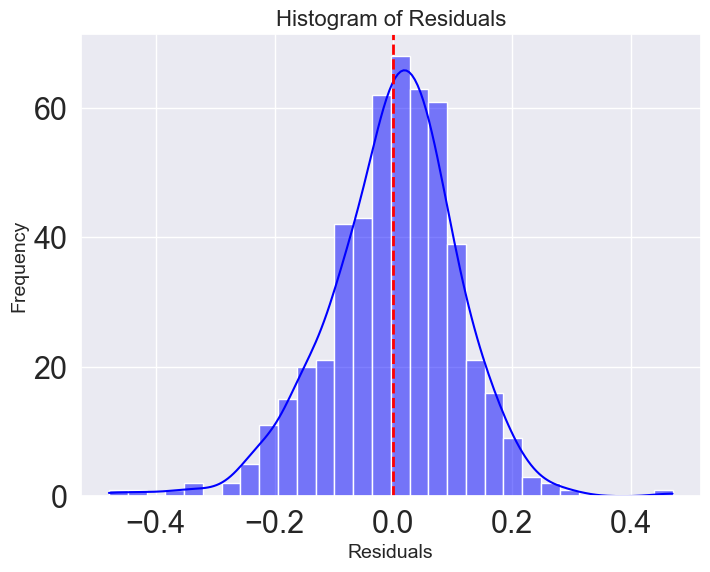

In [98]:
# Plotting the histogram for residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_boombike, kde=True, bins=30, color="blue")
plt.title("Histogram of Residuals", fontsize=16)
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(x=0, color="red", linestyle="--", linewidth=2)  # Add a vertical line at 0
plt.show()

In [99]:
mean_residuals_boombike = round(np.mean(residuals_boombike))
print(mean_residuals_boombike)

0


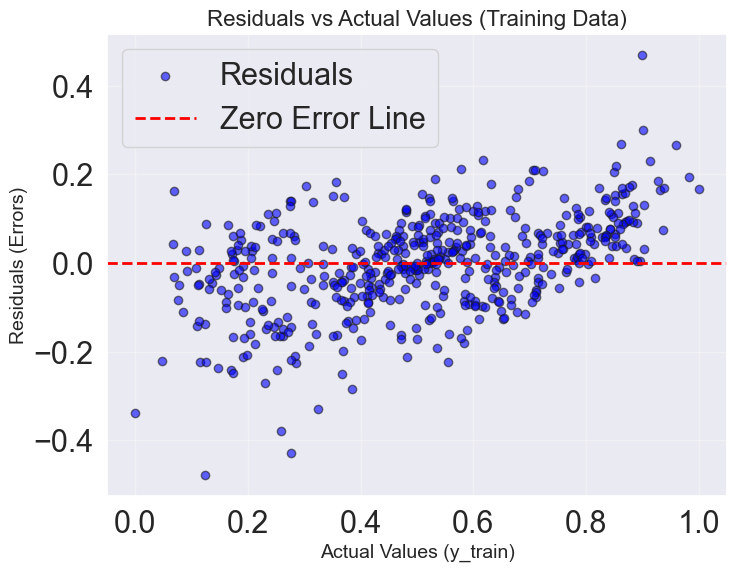

In [100]:
# Assuming y_train contains the actual training set values
# and y_pred_train contains the predicted values for the training set

y_pred_train = y_train_cnt_predict_boombike
y_train = y_train_boombike

residuals = y_train - y_pred_train

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_train, residuals, color="blue", alpha=0.6, edgecolor="k", label="Residuals")

# Add a horizontal line at y=0
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Error Line")

# Labels and title
plt.title("Residuals vs Actual Values (Training Data)", fontsize=16)
plt.xlabel("Actual Values (y_train)", fontsize=14)
plt.ylabel("Residuals (Errors)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

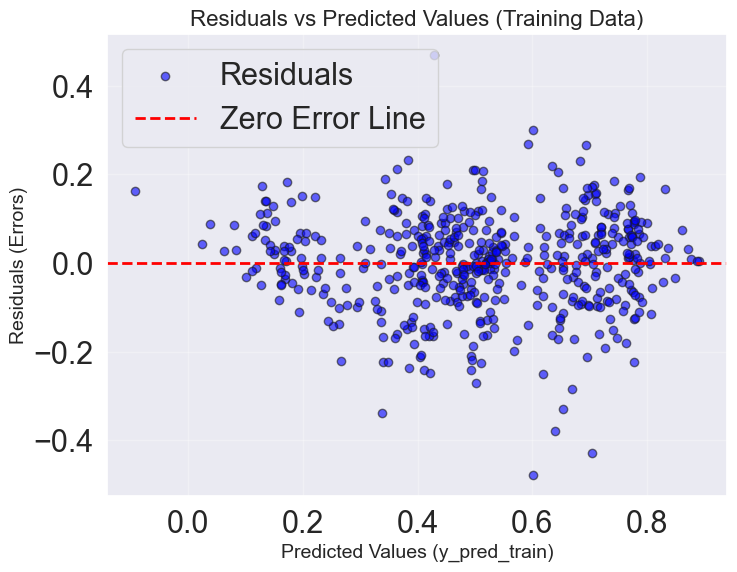

In [101]:
# Assuming y_train contains the actual training set values
# and y_pred_train contains the predicted values for the training set

y_pred_train = y_train_cnt_predict_boombike
y_train = y_train_boombike

residuals = y_train - y_pred_train

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_pred_train, residuals, color="blue", alpha=0.6, edgecolor="k", label="Residuals")

# Add a horizontal line at y=0
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Error Line")

# Labels and title
plt.title("Residuals vs Predicted Values (Training Data)", fontsize=16)
plt.xlabel("Predicted Values (y_pred_train)", fontsize=14)
plt.ylabel("Residuals (Errors)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**To Predict**

In [102]:
numeric_vars = ['atemp','hum','windspeed','cnt']

In [103]:
df_boombike_test[numeric_vars] = minmax_scaler_boombike.transform(df_boombike_test[numeric_vars])

In [104]:
y_test = df_boombike_test.pop('cnt')
X_test = df_boombike_test

In [105]:
x_train_boombike_new.drop('const',axis=1,inplace=True)

In [106]:
X_test_new = X_test[x_train_boombike_new.columns]

In [107]:
X_test_new = sm.add_constant(X_test_new)

In [108]:
y_pred1_boombike = lr_model_07.predict(X_test_new)

**Model Evaluation**

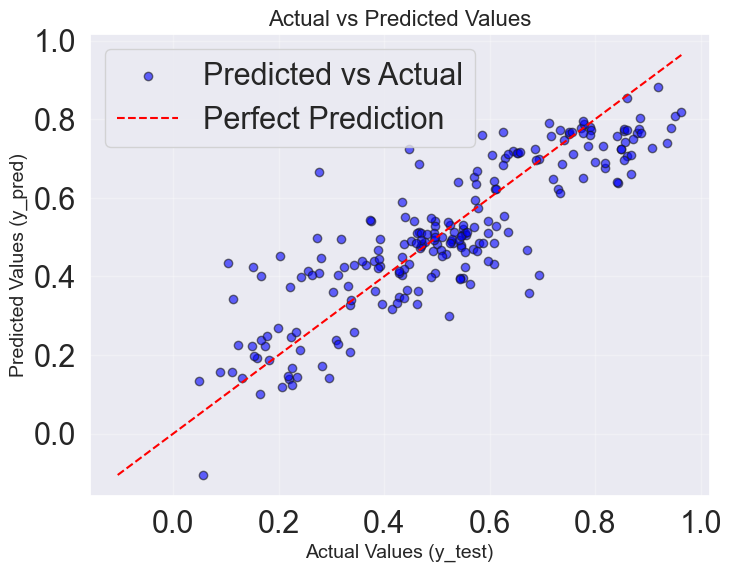

In [109]:
y_pred = y_pred1_boombike

# Assuming y_test contains the actual values and y_pred contains the predicted values
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k", label="Predicted vs Actual")

# Add a perfect prediction line
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect Prediction")

# Plot labels and title
plt.title("Actual vs Predicted Values", fontsize=16)
plt.xlabel("Actual Values (y_test)", fontsize=14)
plt.ylabel("Predicted Values (y_pred)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [110]:
r2_value_boombike = (r2_score(y_test, y_pred))*100
print(r2_value_boombike)

74.64248751414755


___________________________________________________________________________________________________________